In [1]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.ticker as mtick

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [2]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
T = 7*8

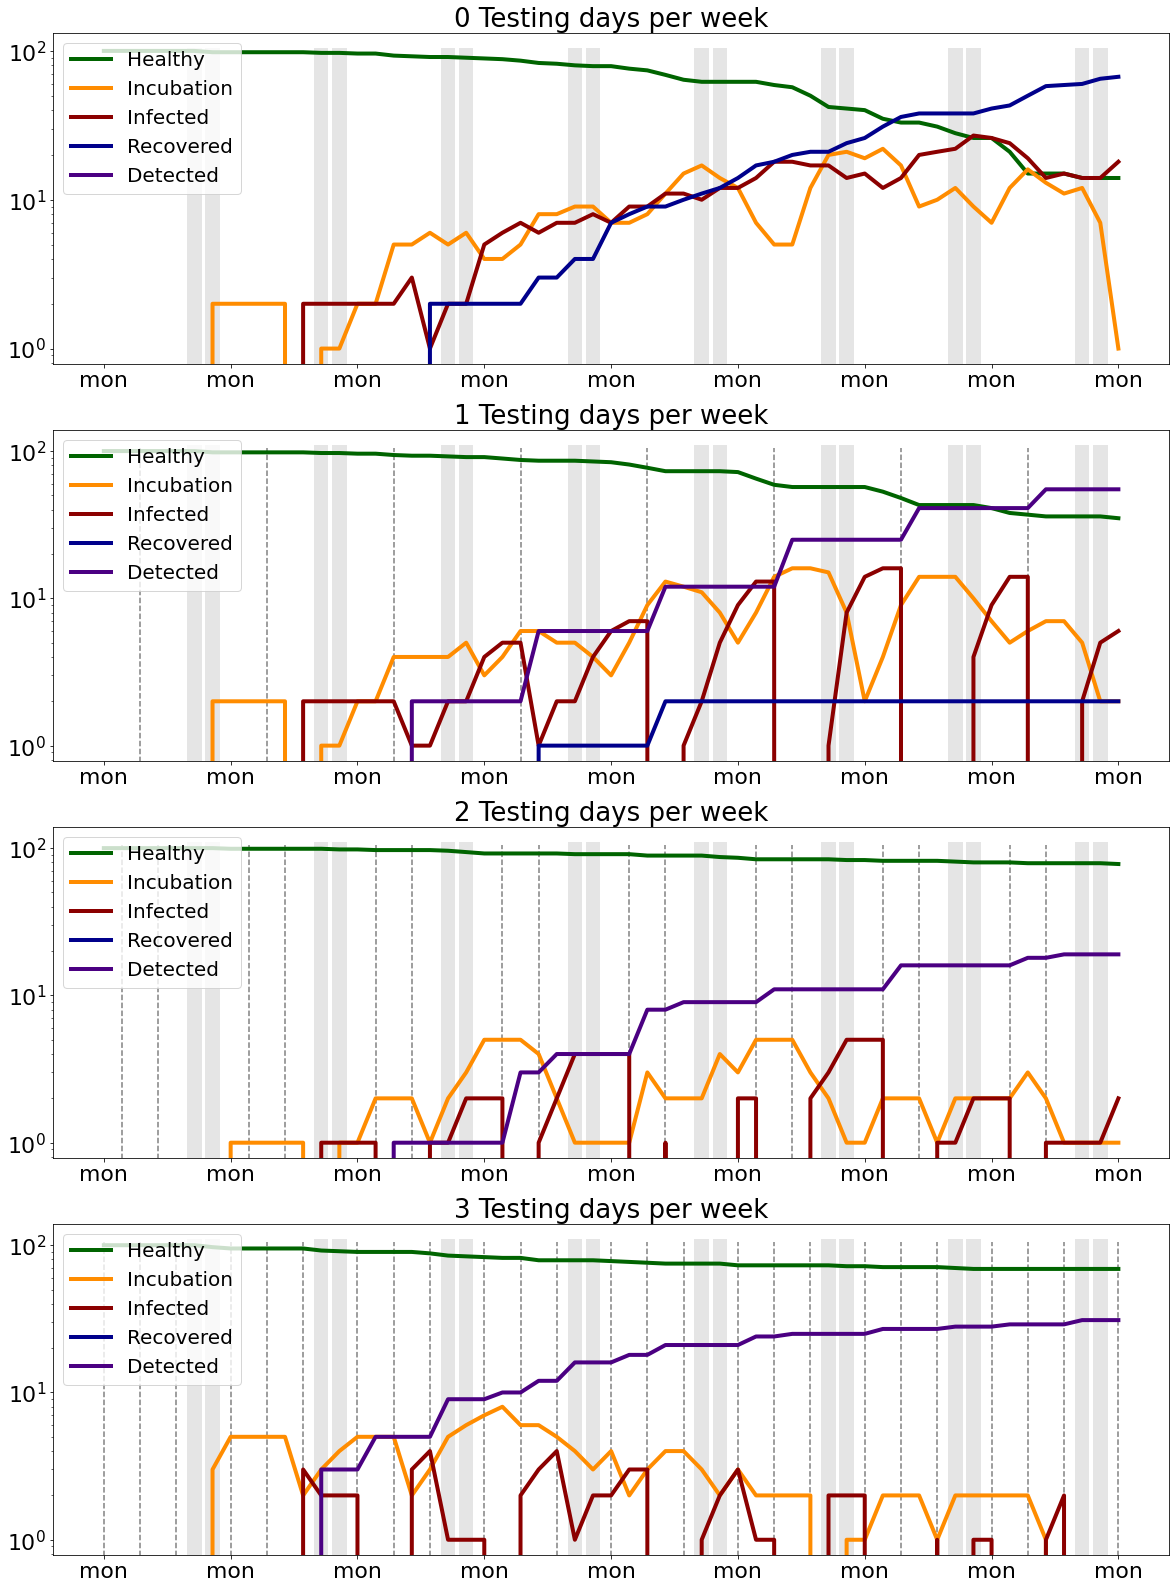

In [66]:
fig, ax = plt.subplots(4,1,figsize = (20, 7*4))
labels = ['Healthy', 'Incubation', 'Infected', 'Recovered', 'Detected']
colors = ['darkgreen', 'darkorange', 'darkred', 'darkblue', 'indigo']
Testing_days = [[], [2], [1,3], [0,2,4]]
mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]
weekends = [i for i in range(0,T+1) if (np.any(np.isin([5,6], i%7)))]
for d in range(4):
    data = np.loadtxt(Text_files_path+"output_%d-testing_days.txt"%(d))
    testing_days = [i for i in range(0,T+1) if (np.any(np.isin(Testing_days[d], i%7)))]
    for k in range(5):
        ax[d].set_title('%d Testing days per week'%(d), fontsize = 26)
        ax[d].plot(data[:,k], linewidth = 4, color = colors[k], label = labels[k])
    ax[d].vlines(testing_days, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'grey')
    ax[d].bar(weekends,height = ax[d].get_ylim()[1], color = 'grey', alpha = .2)
    #ax[d].vlines(mondays, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'black')
    ax[d].set_xticks([i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].set_xticklabels([days[i%7] for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].tick_params(labelsize = 22)
    ax[d].tick_params(labelsize = 22)
    ax[d].legend(loc = 2, fontsize = 20)
    ax[d].set_yscale('log')
    

fig.savefig('../../Figures/Kitas_Schools/dynamics_Kitas.pdf')

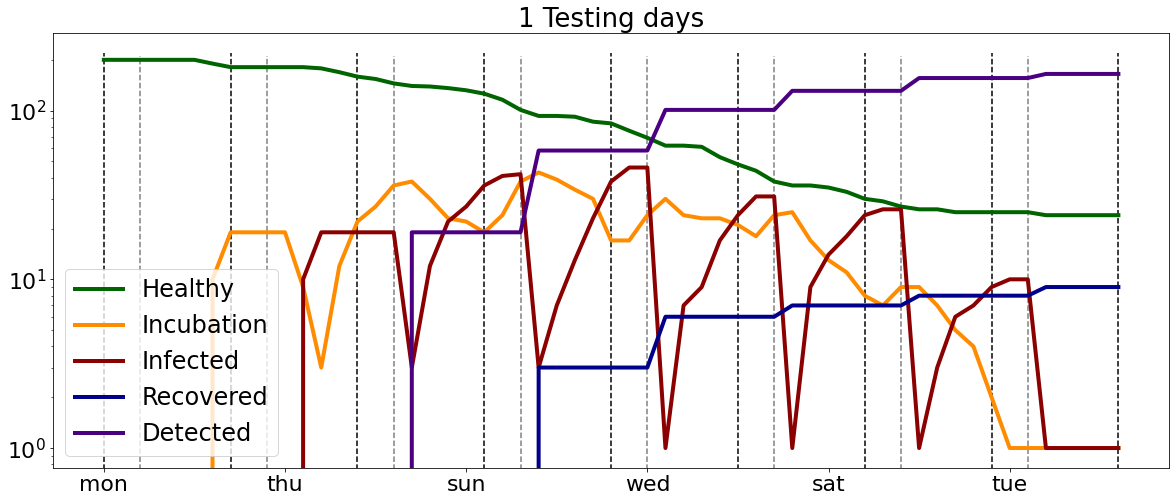

In [43]:
data = np.loadtxt(Text_files_path+"output_1-testing_days.txt")
h = data[:,0]
inc = data[:,1]
inf = data[:,2]
rec = data[:,3]
det = data[:,4]
testing_days = [i for i in range(0,T+1) if (np.any(np.isin([2], i%7)))]
mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]

fig, ax = plt.subplots(figsize = (20, 8))
ax.set_title('%d Testing days'%(1), fontsize = 26)
ax.plot(h, linewidth = 4, color = 'darkgreen', label = 'Healthy')
ax.plot(inc, linewidth = 4, color = 'darkorange', label = 'Incubation')
ax.plot(inf, linewidth = 4, color = 'darkred', label = 'Infected')
ax.plot(rec, linewidth = 4, color = 'darkblue', label = 'Recovered')
ax.plot(det, linewidth = 4, color = 'indigo', label = 'Detected')
ax.vlines(testing_days, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'grey')
ax.vlines(mondays, 0, ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
ax.tick_params(labelsize = 22)
labels = np.array([days[int(i%7)] for i in (ax.get_xticks()[1:-1])])
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 22)
ax.legend(loc = 0, fontsize = 24)
ax.set_yscale('log')

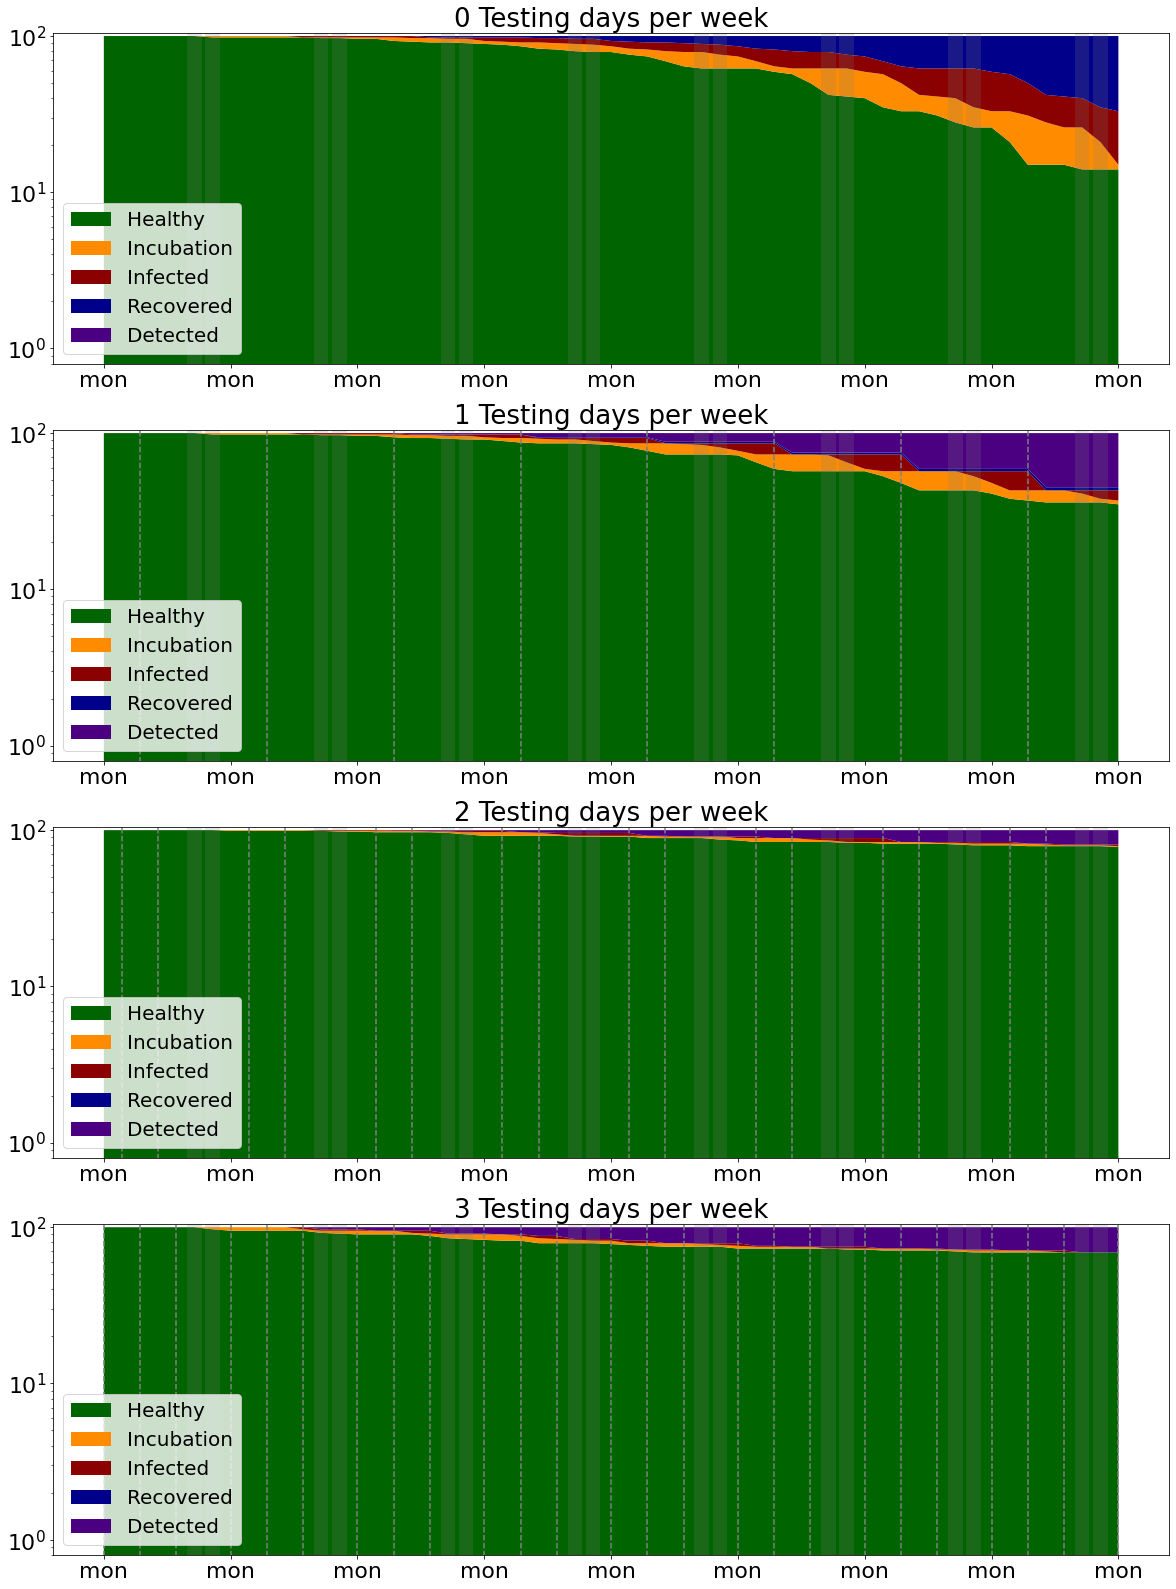

In [71]:
fig, ax = plt.subplots(4,1,figsize = (20, 7*4))

Testing_days = [[], [2], [1,3], [0,2,4]]
labels = ['Healthy', 'Incubation', 'Infected', 'Recovered', 'Detected']
colors = ['darkgreen', 'darkorange', 'darkred', 'darkblue', 'indigo']
for d in range(4):
    data = np.loadtxt(Text_files_path+"output_%d-testing_days.txt"%(d))
    h = data[:,0]
    inc = data[:,1]
    inf = data[:,2]
    rec = data[:,3]
    det = data[:,4]
    testing_days = [i for i in range(0,T+1) if (np.any(np.isin(Testing_days[d], i%7)))]
    mondays = [i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))]

    ax[d].set_title('%d Testing days per week'%(d), fontsize = 26)
    ax[d].stackplot(range(T+1),data.transpose(), colors = colors, labels=labels)
    ax[d].vlines(testing_days, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'grey')
    #ax[d].vlines(mondays, 0, ax[d].get_ylim()[1], linestyle = 'dashed', color = 'black')
    ax[d].set_xticks([i for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].set_xticklabels([days[i%7] for i in range(0,T+1) if (np.any(np.isin([0], i%7)))])
    ax[d].tick_params(labelsize = 22)
    ax[d].tick_params(labelsize = 22)
    ax[d].legend(loc = 3, fontsize = 20)
    ax[d].set_yscale('log')
    ax[d].bar(weekends,height = ax[d].get_ylim()[1], color = 'grey', alpha = .2)
    ax[d].set_ylim(.8, 105)
    
fig.savefig('../../Figures/Kitas_Schools/dynamics_Kitas_stackplot.pdf')

## Statistics of ensemble

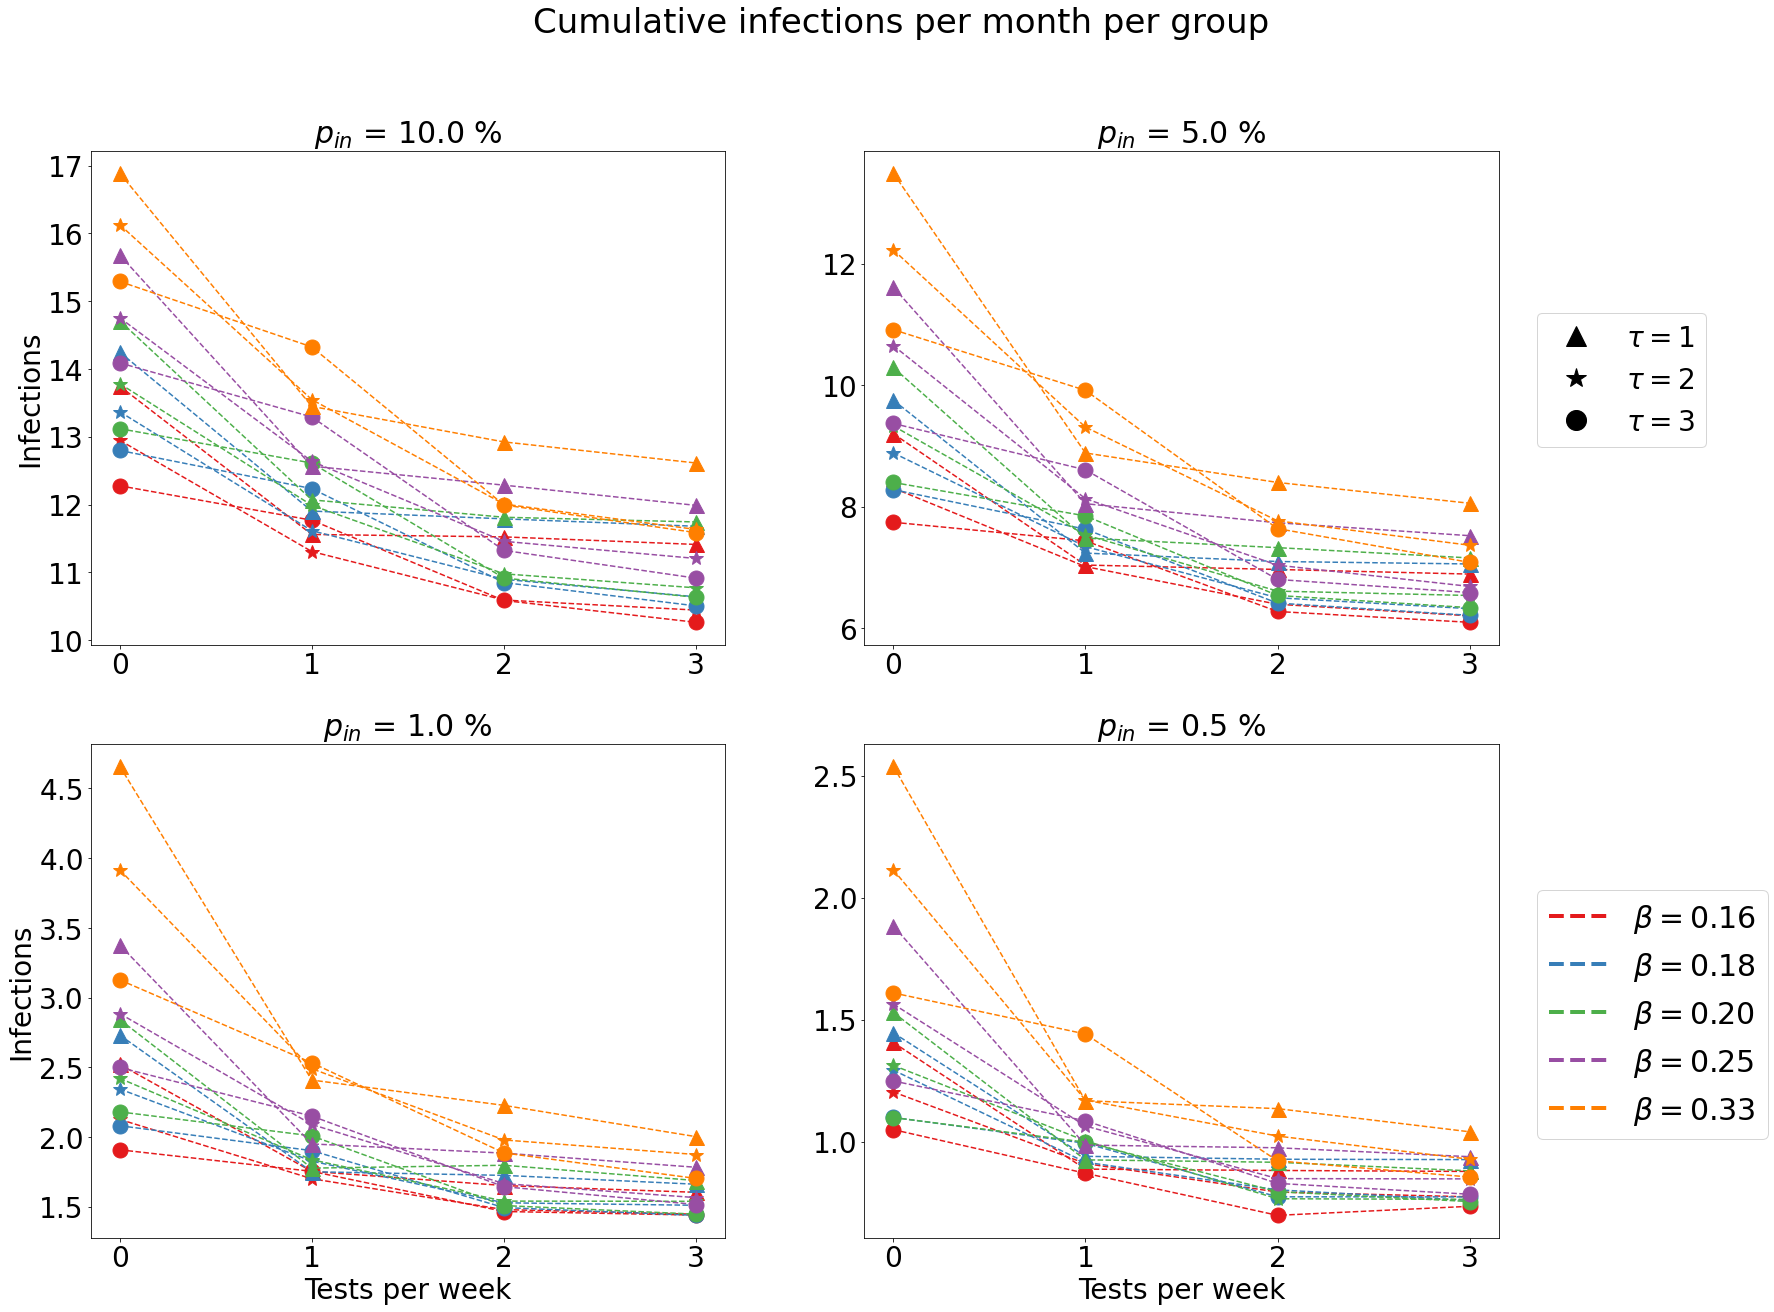

In [249]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.16, 0.18, 0.20, 0.25, 0.33]
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data)))/(1))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([0,1,2,3],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([0,1,2,3])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig.suptitle('Cumulative infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_infections.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_infections.png')

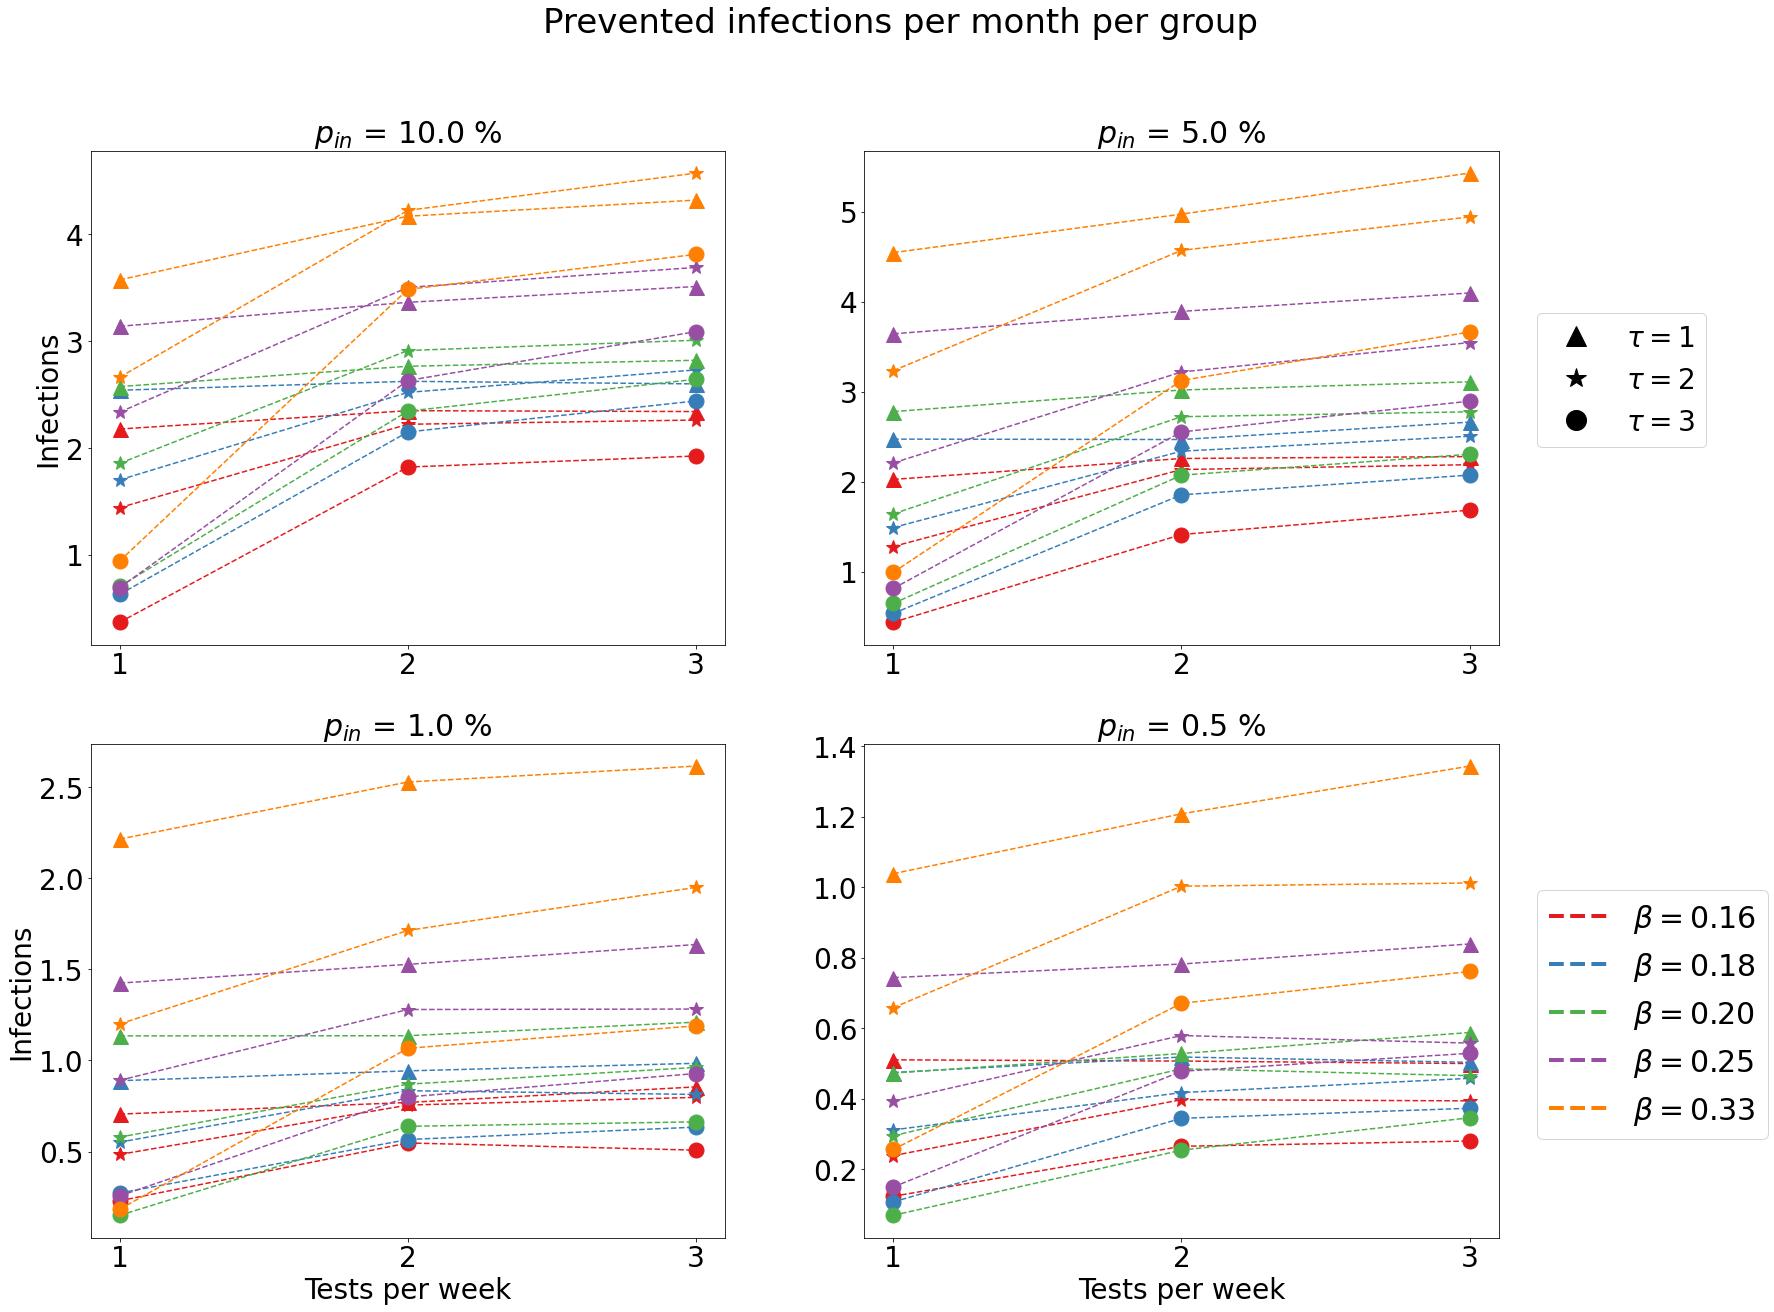

In [239]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.16, 0.18, 0.20, 0.25, 0.33]
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([1,2,3])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections.png')

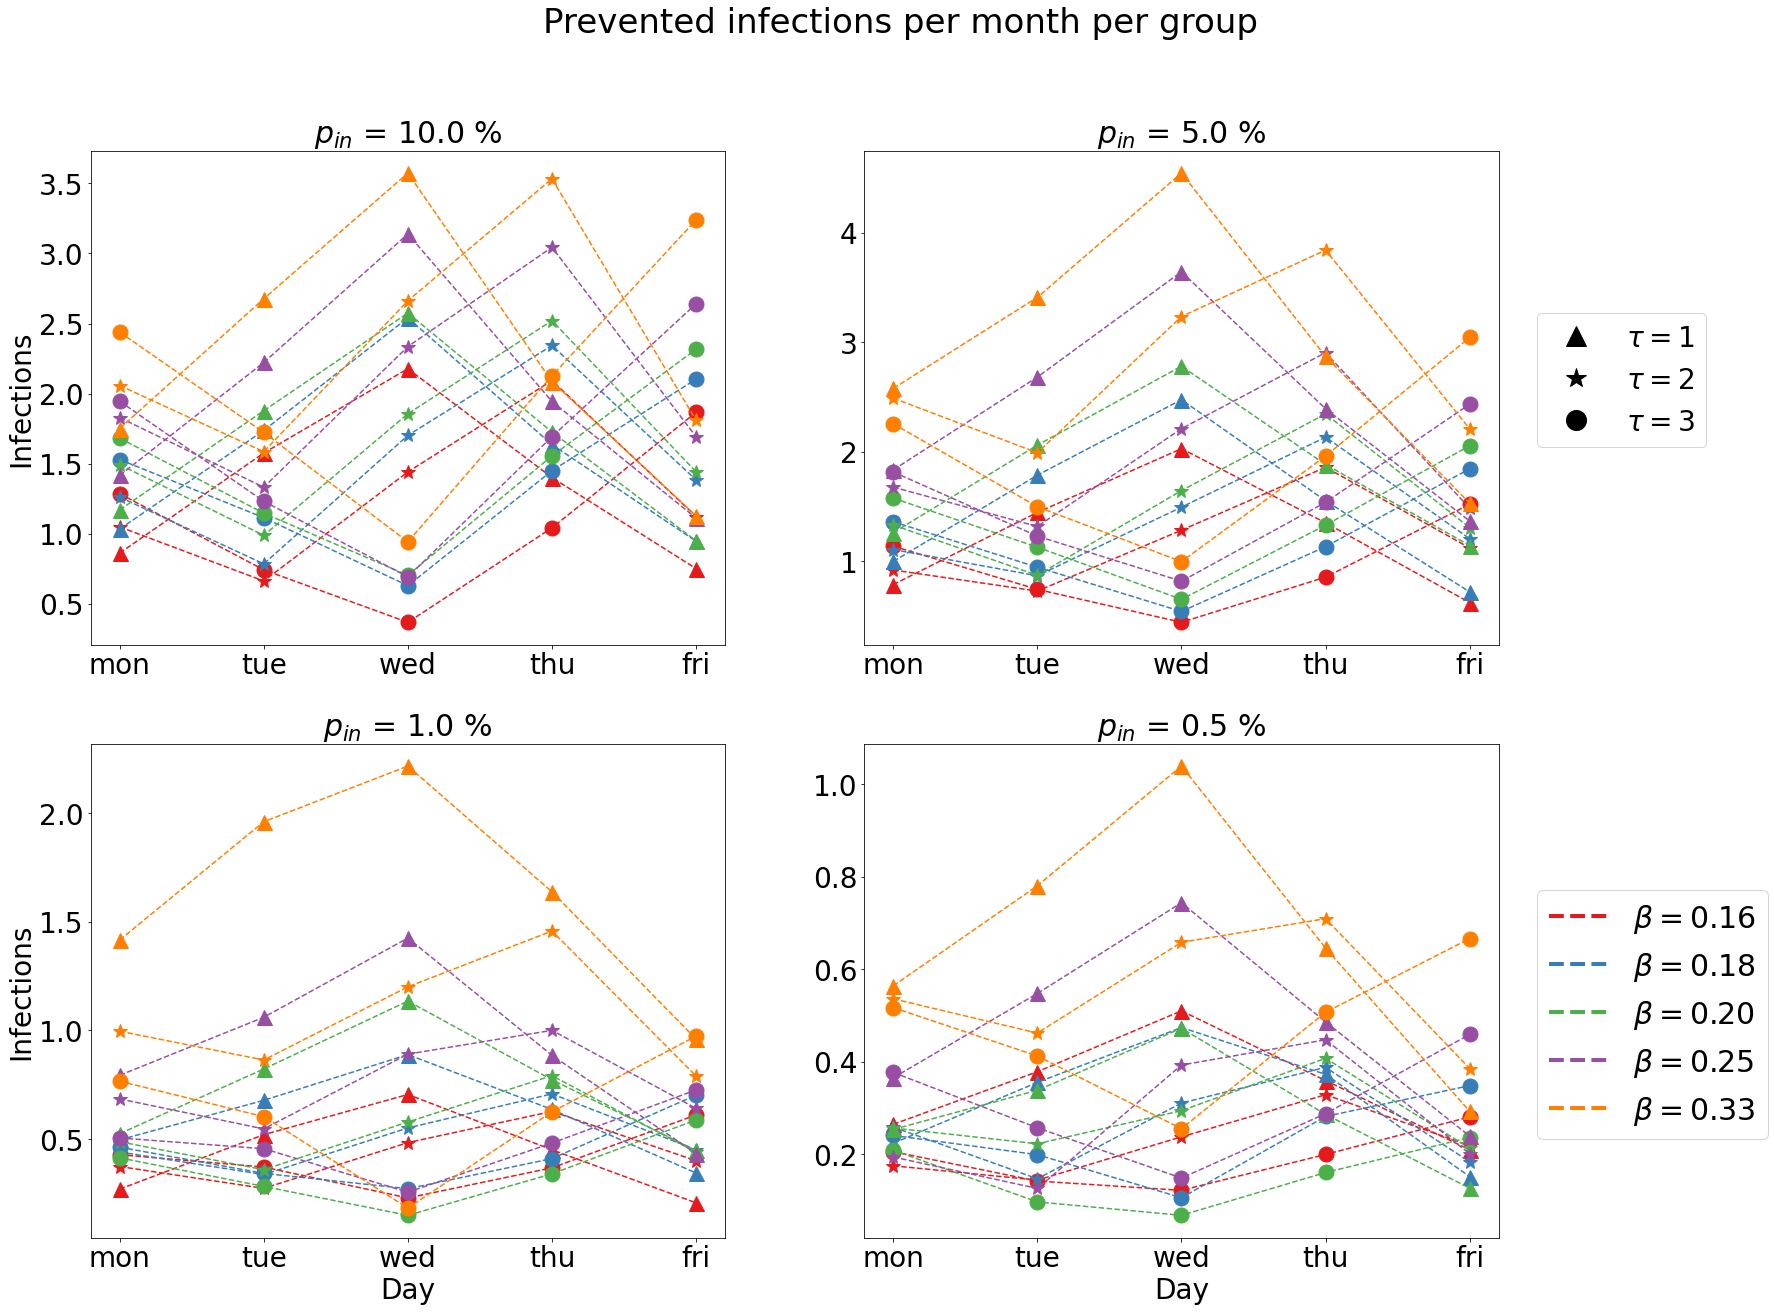

In [240]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=np.array([0.16, 0.18, 0.20, 0.25, 0.33])
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([0, 1, 2, 3, 4])
            ax[int(l/2),l%2].set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Day', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day.png')


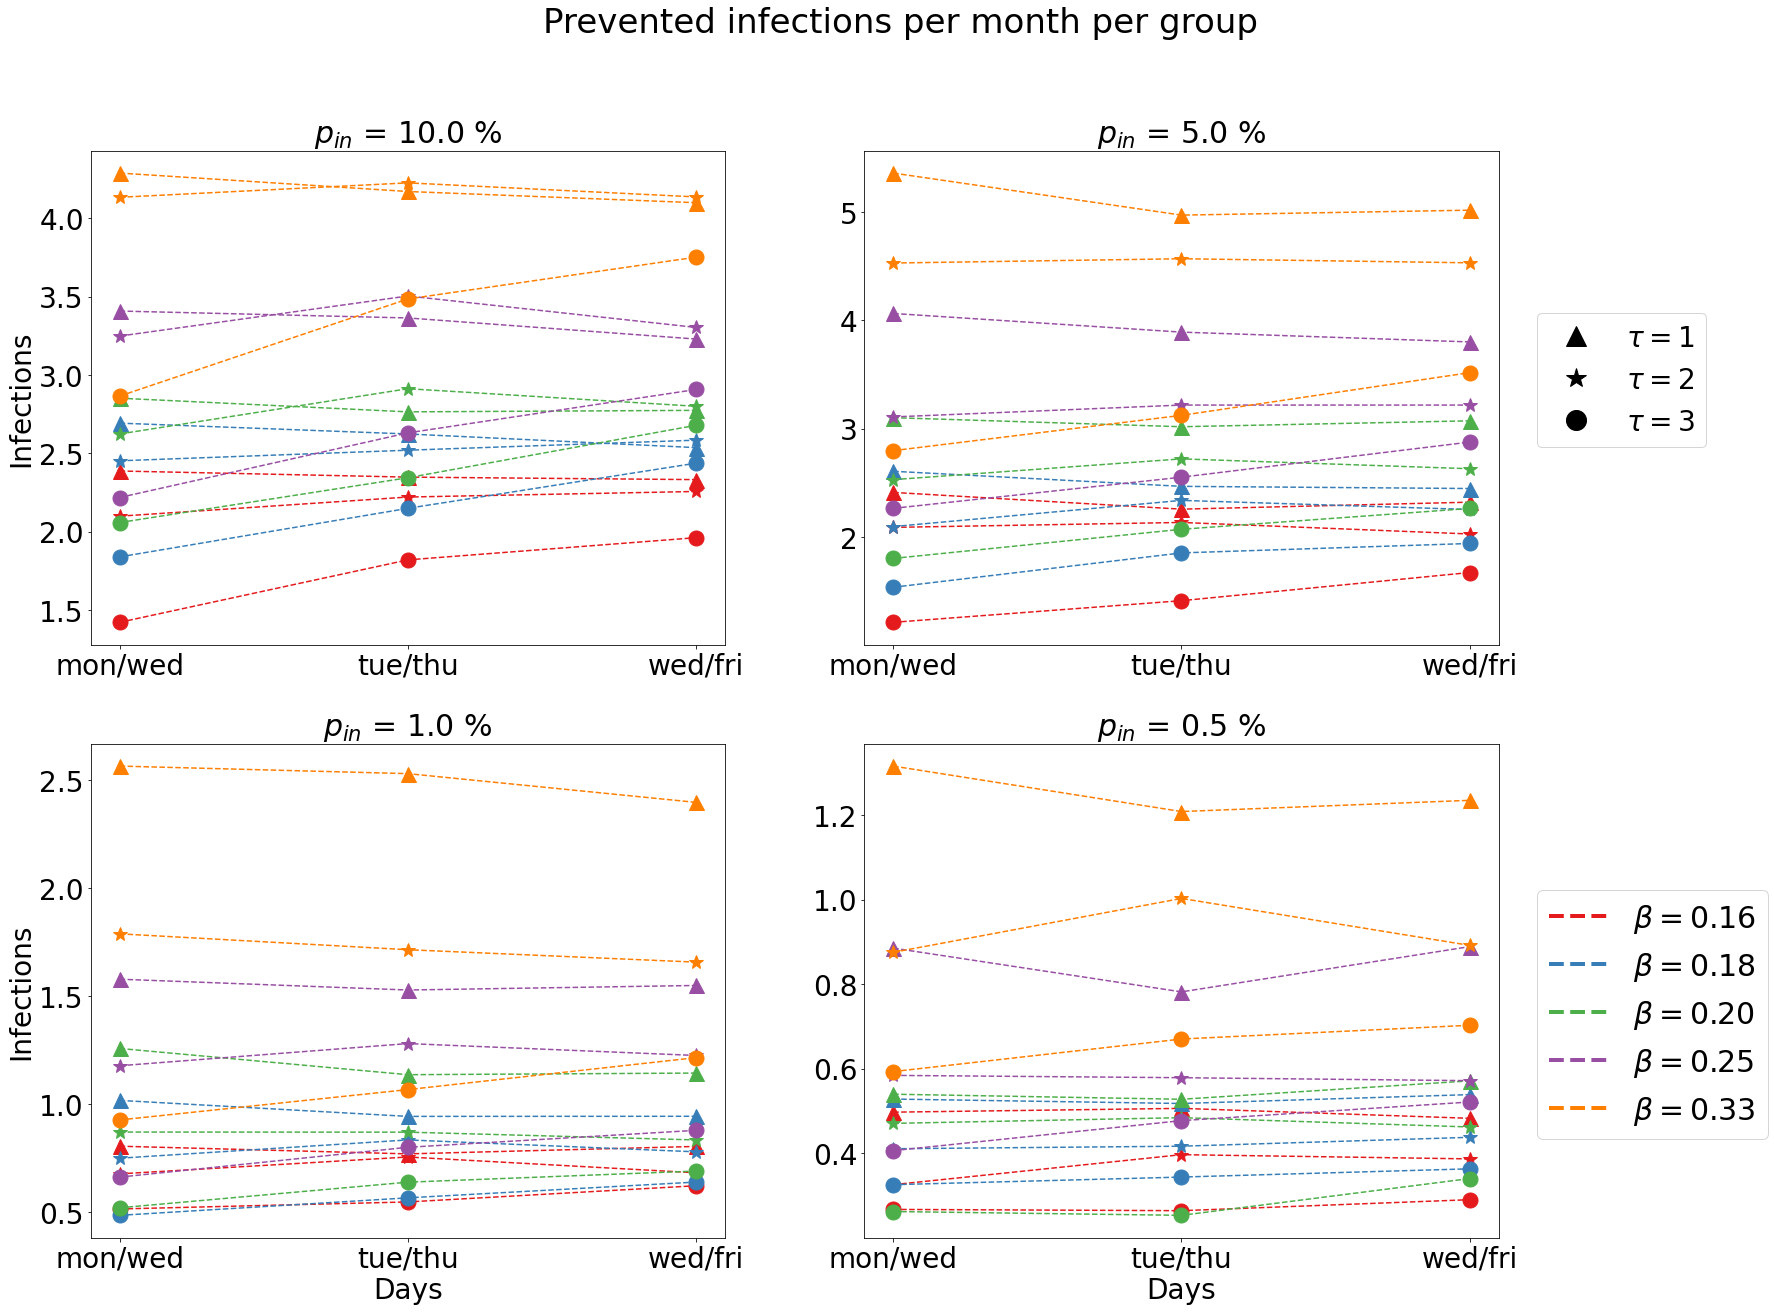

In [241]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=np.array([0.16, 0.18, 0.20, 0.25, 0.33])
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([0, 1, 2])
            ax[int(l/2),l%2].set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Days', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days.png')



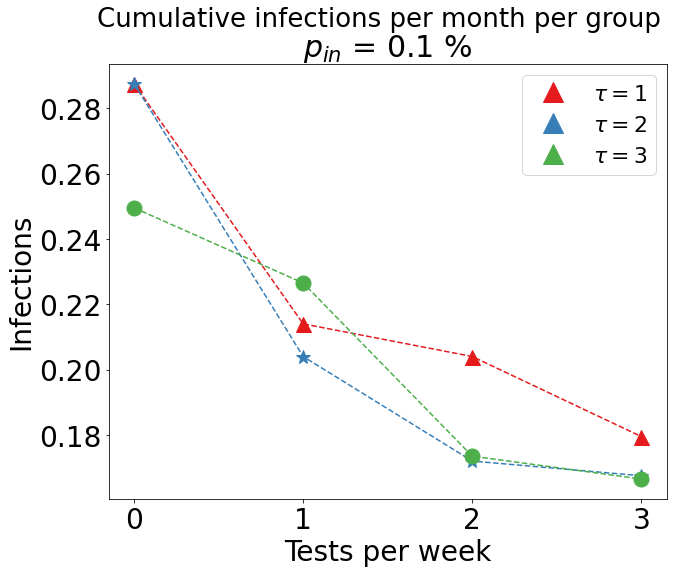

In [37]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(1,1,figsize = (10,8))
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data)))/(1))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax.plot([0,1,2,3],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2,3],y=means, yerr=stds/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0,1,2,3])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            

            ax.set_xlabel('Tests per week', fontsize = 28)

            ax.set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color= i, lw=4) for i in colors]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
#custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
#labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Cumulative infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f_estimate.png'%(beta))



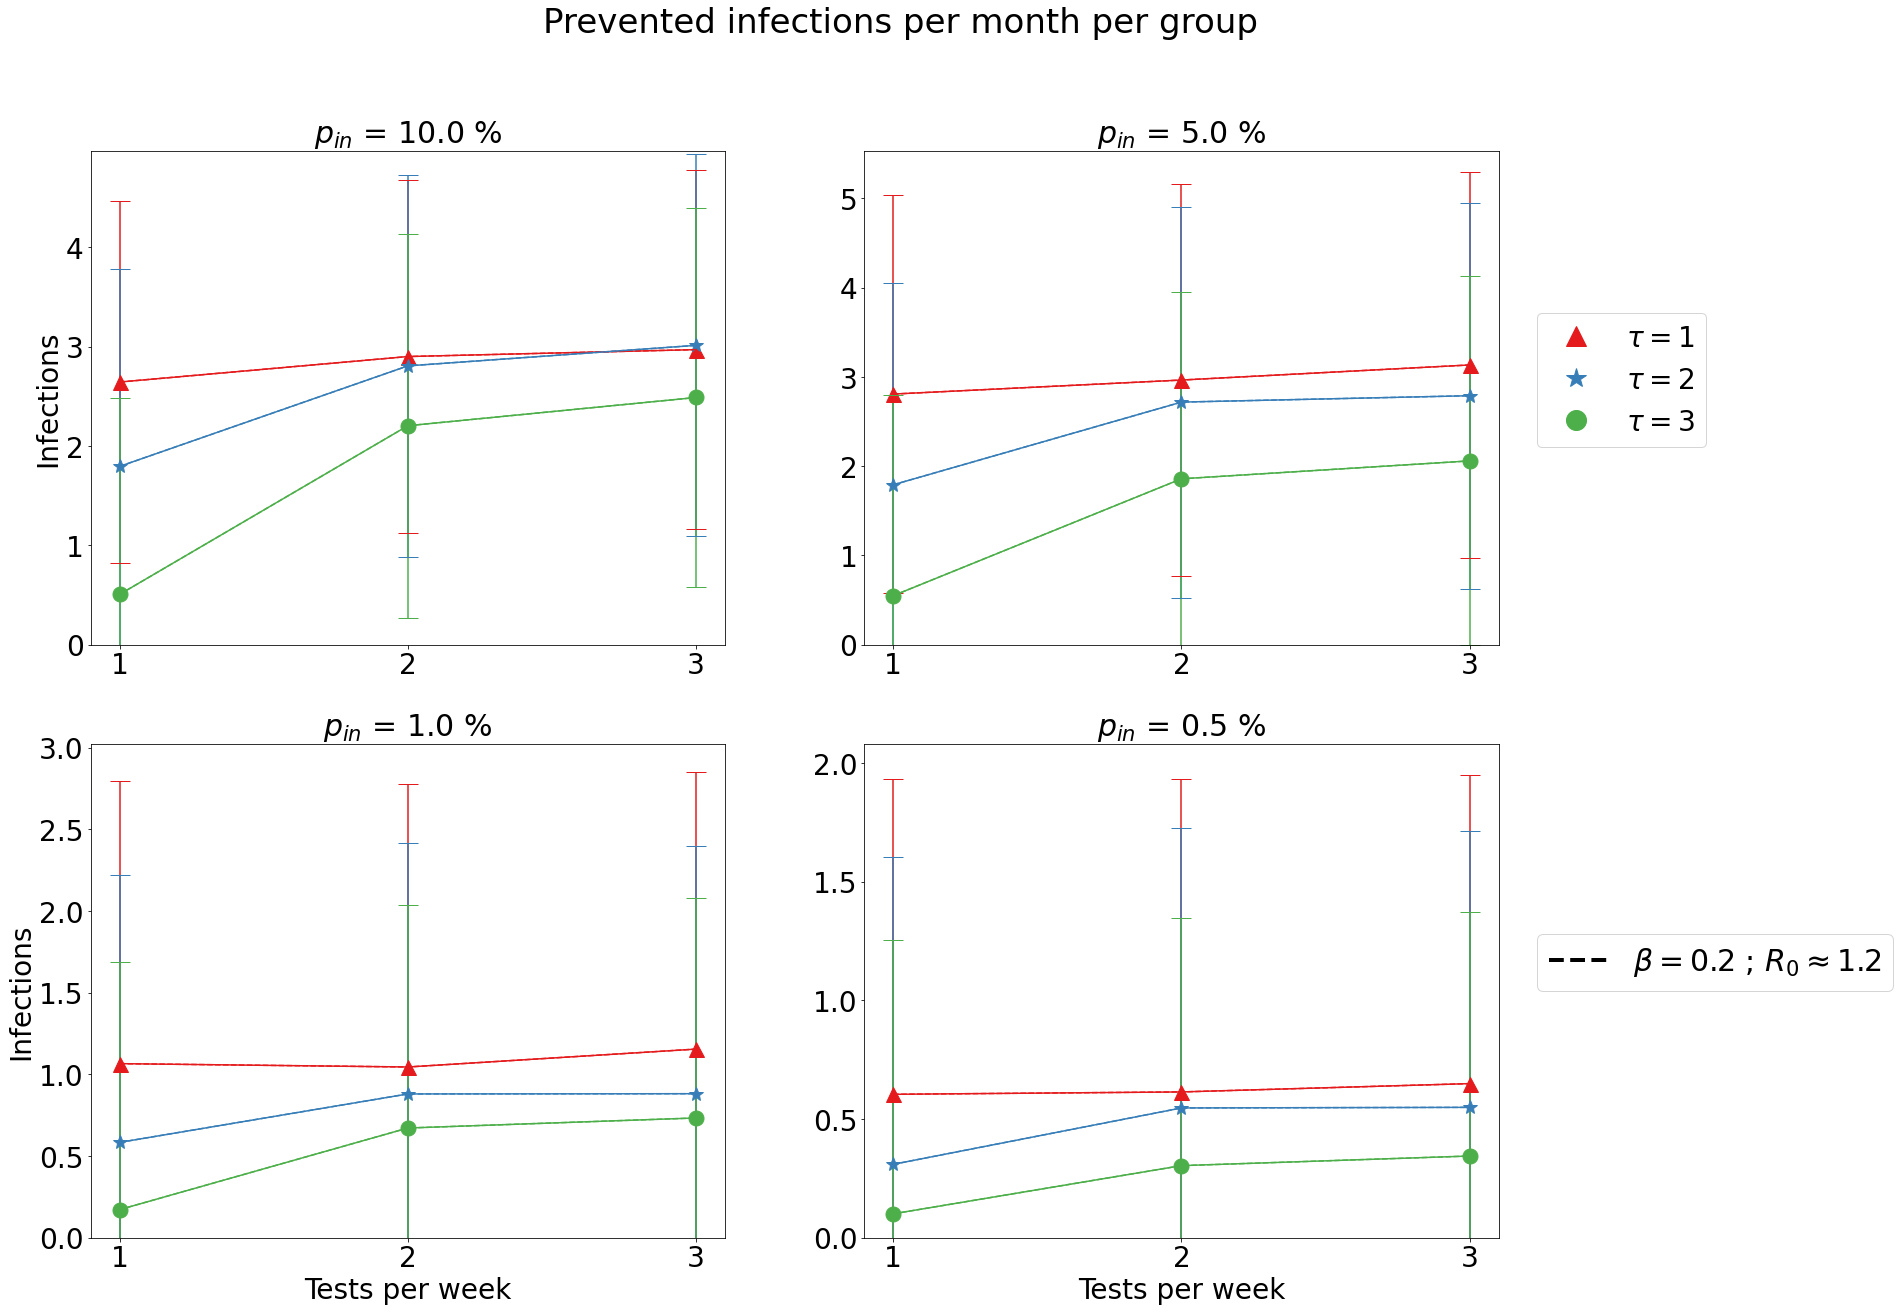

In [264]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.20]
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            ax[int(l/2),l%2].errorbar(x=[1,2,3],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([1,2,3])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            ax[int(l/2),l%2].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f.png'%(beta))


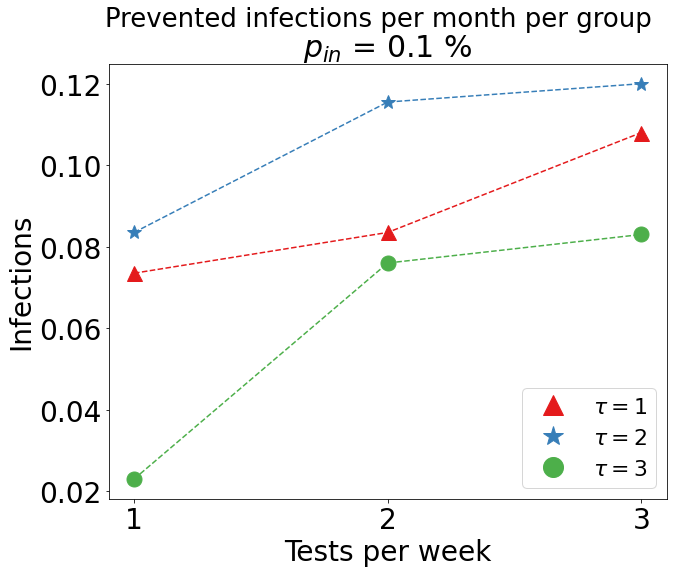

In [36]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(figsize = (10,8))
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax.plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[1,2,3],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([1,2,3])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Tests per week', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f_estimate.png'%(beta))



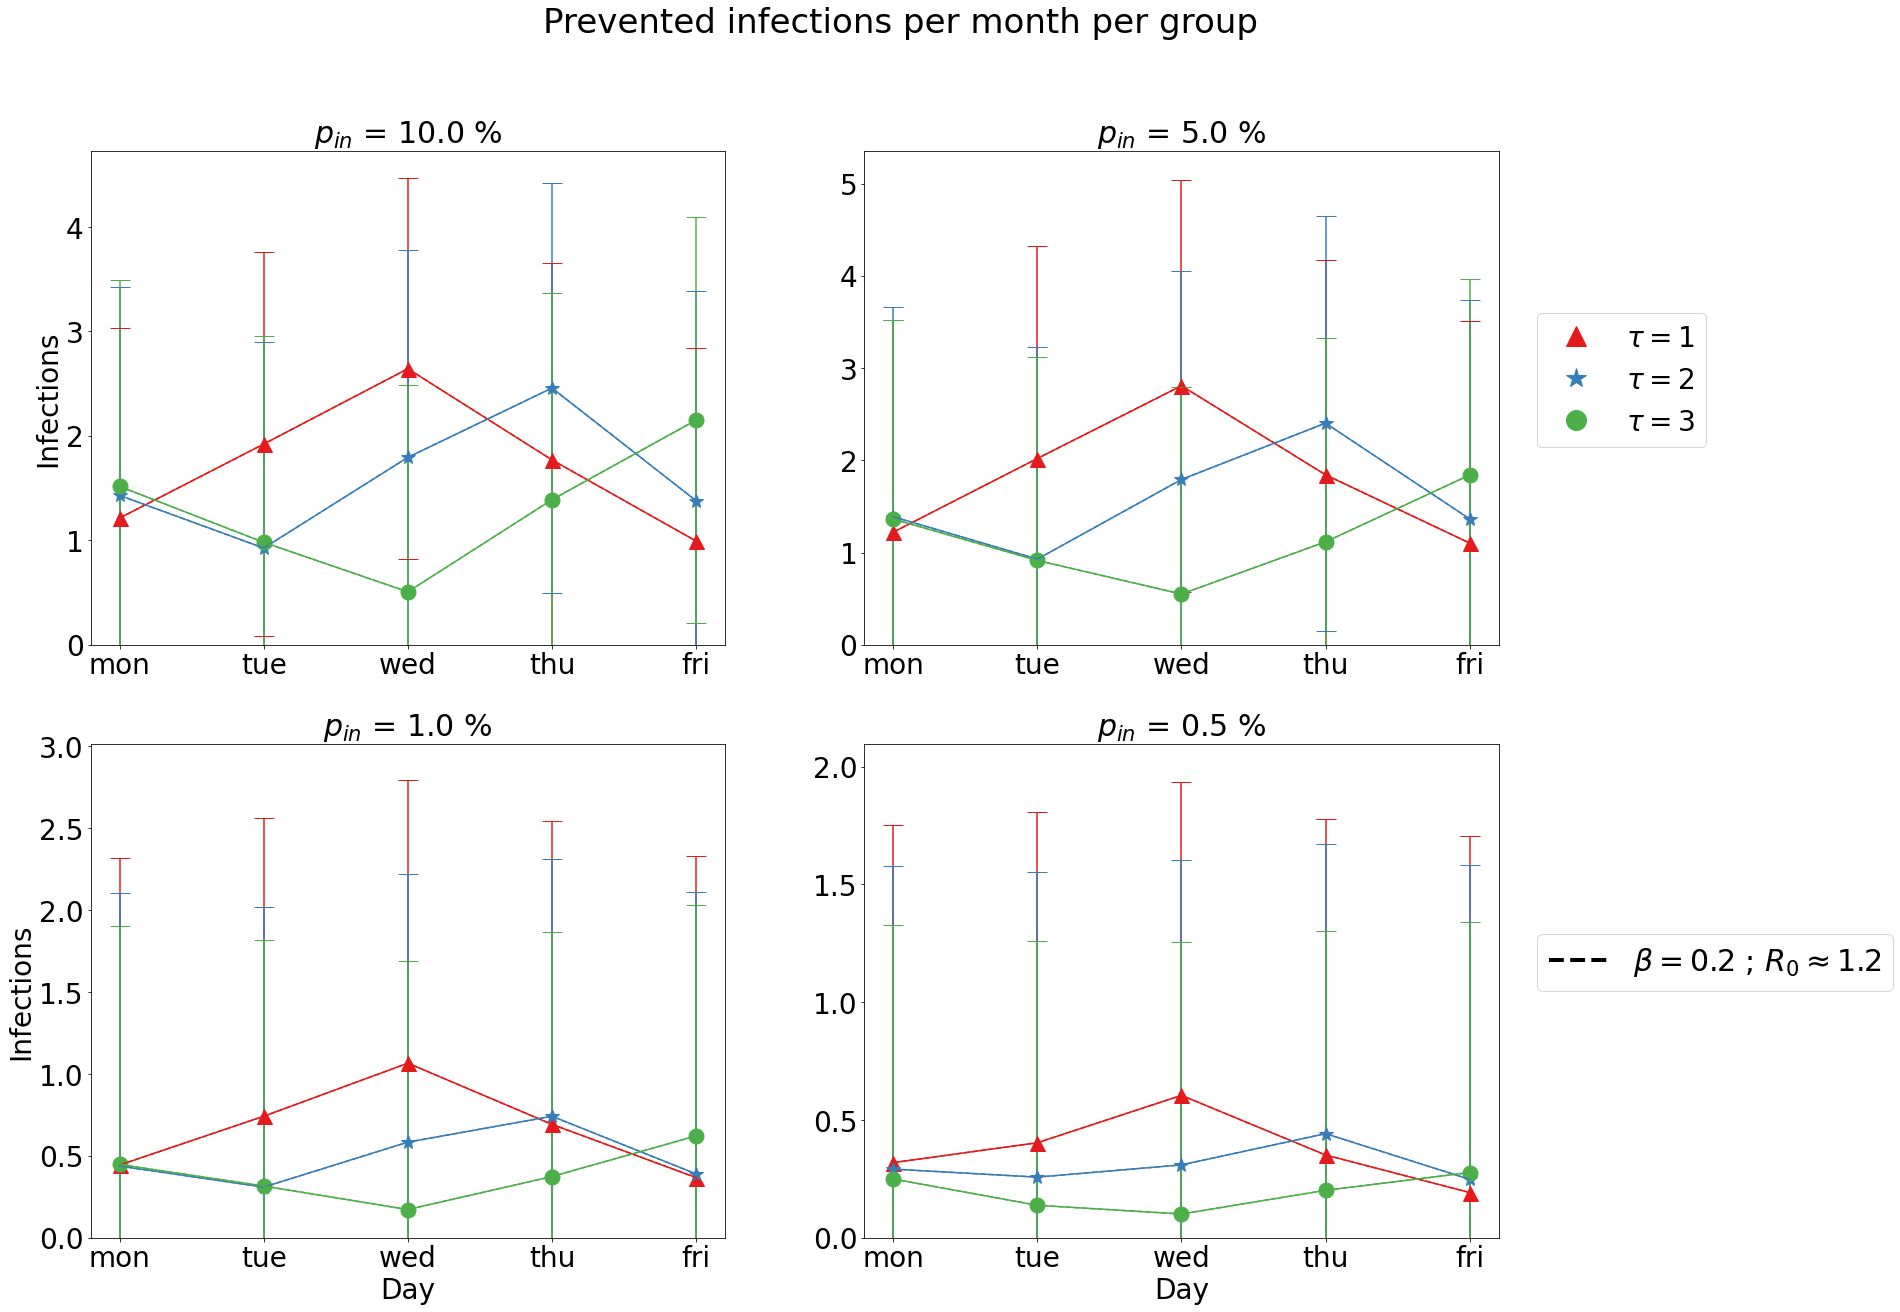

In [265]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=np.array([0.20])
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            ax[int(l/2),l%2].errorbar(x=[0,1,2,3,4],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([0, 1, 2, 3, 4])
            ax[int(l/2),l%2].set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Day', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            ax[int(l/2),l%2].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f.png'%(beta))



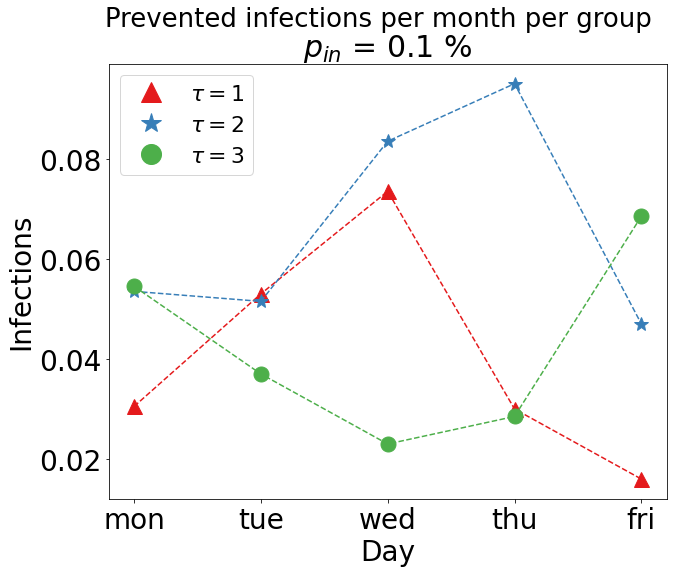

In [35]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=np.array([0.18])
p_in_s=[0.0011]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(figsize = (10,8))
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax.plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2,3,4],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0, 1, 2, 3, 4])
            ax.set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Day', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax[0,2].axis('off')
#ax[1,2].axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f_estimate.png'%(beta))




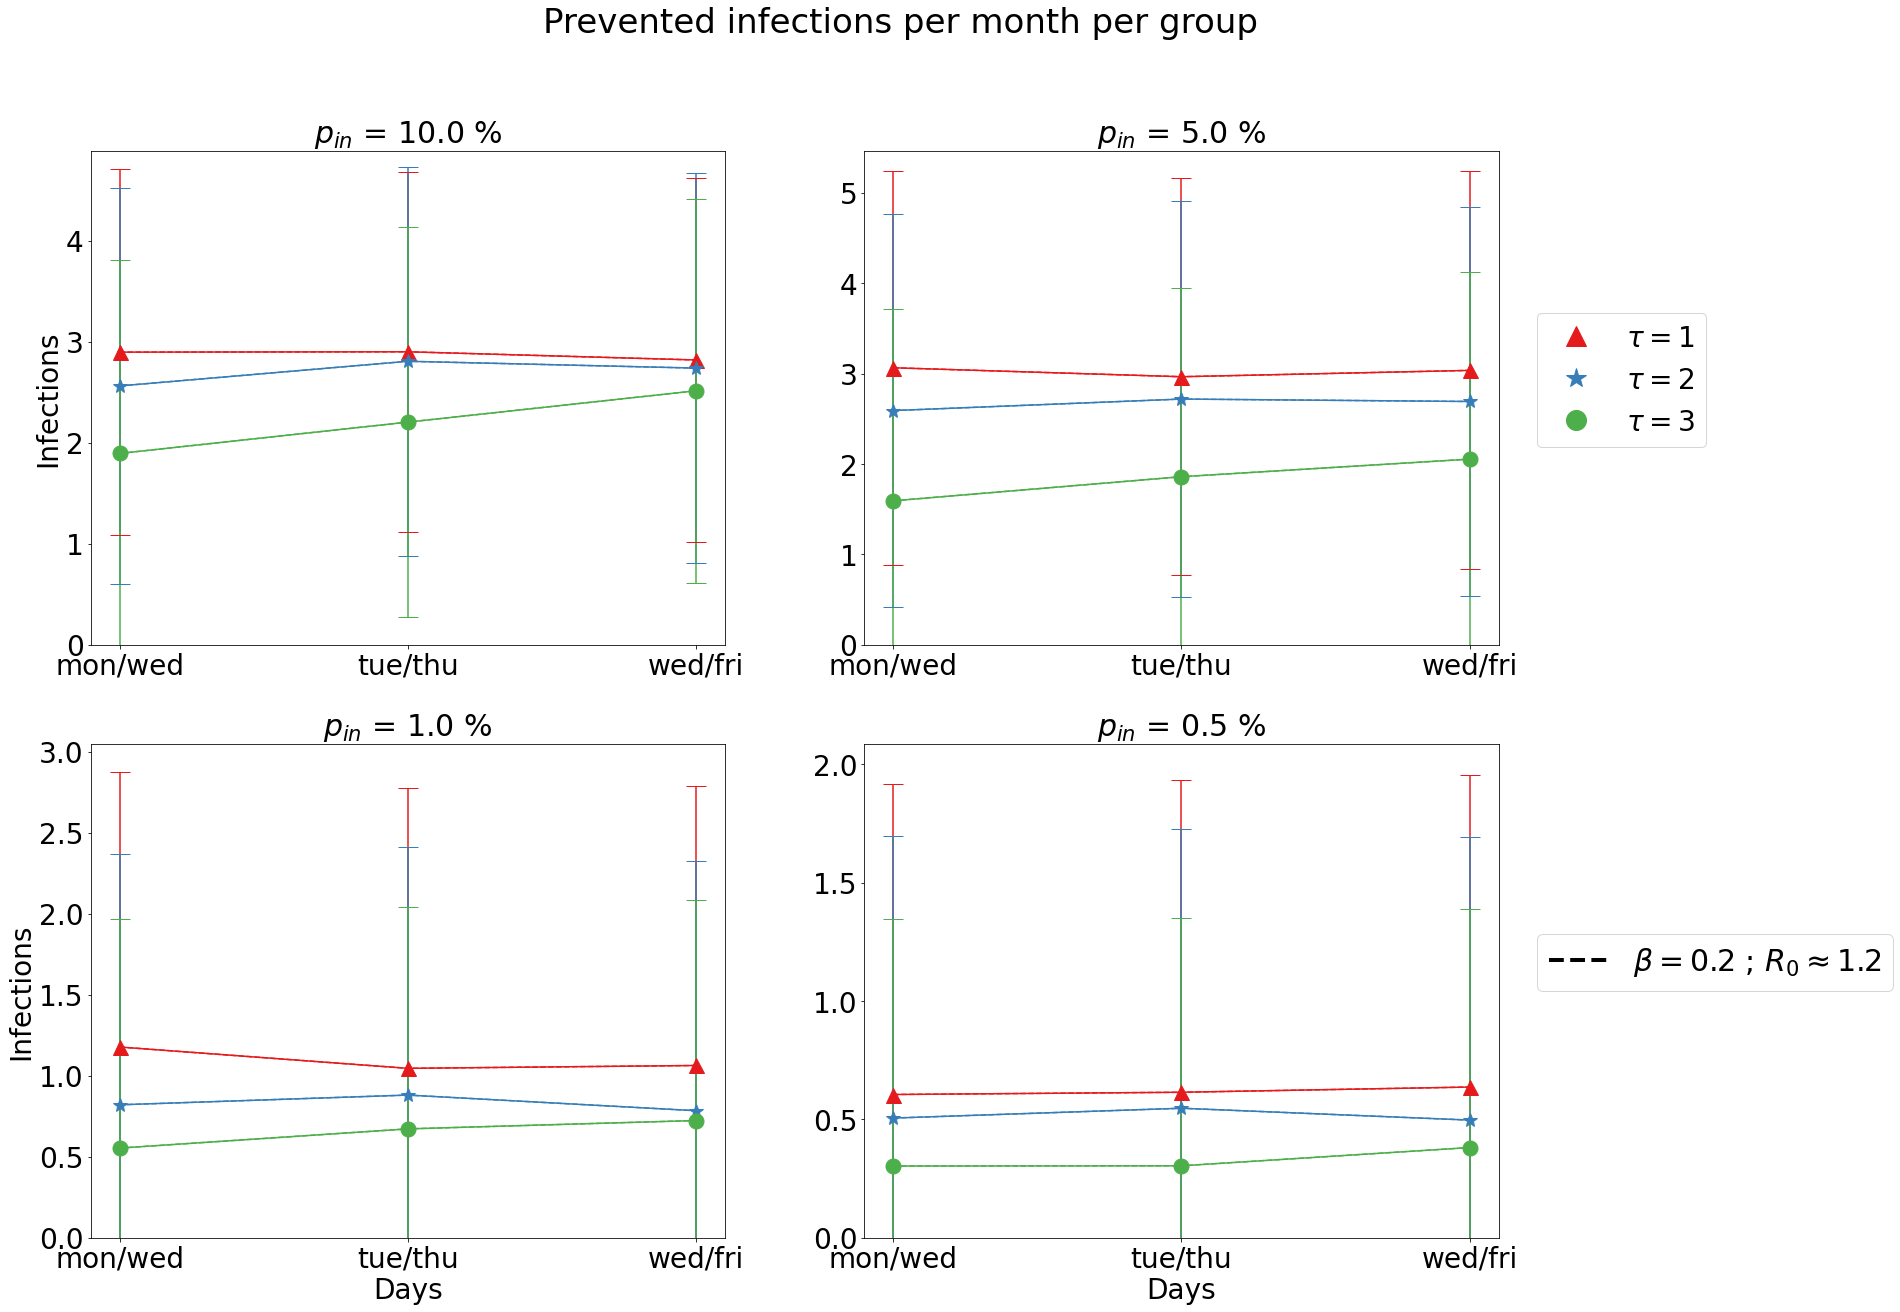

In [266]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=np.array([0.20])
p_in_s=[0.1, 0.05, 0.01, 0.005]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(2,3,figsize = (30,20), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax[int(l/2),l%2].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[int(l/2),l%2].plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            ax[int(l/2),l%2].errorbar(x=[0,1,2],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[int(l/2),l%2].tick_params(labelsize = 28)
            ax[int(l/2),l%2].set_xticks([0, 1, 2])
            ax[int(l/2),l%2].set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[int(l/2),l%2].set_xlabel('Days', fontsize = 28)
            if(l%2==0):
                ax[int(l/2),l%2].set_ylabel('Infections', fontsize = 28)
            ax[int(l/2),l%2].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[0,2].axis('off')
ax[1,2].axis('off')
ax[0,2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f.png'%(beta))


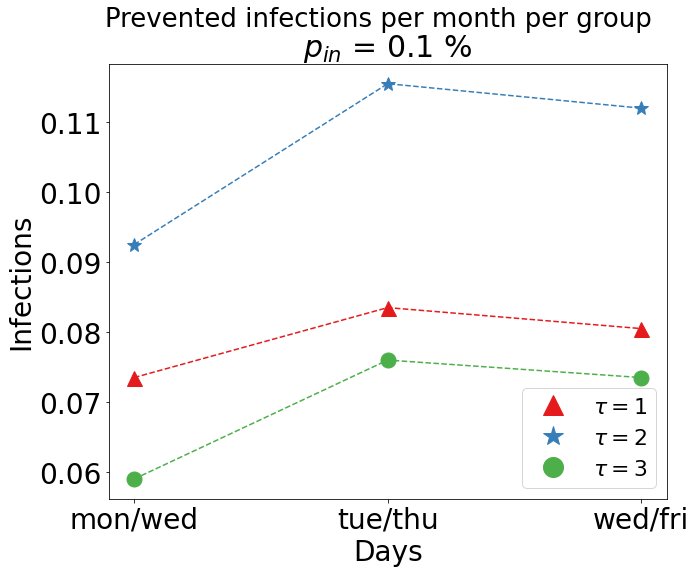

In [34]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=np.array([0.18])
p_in_s=[0.0011]
taus=[1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o']

fig, ax = plt.subplots(figsize = (10,8))
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                means = np.append(means, ((np.mean(data0)) - (np.mean(data)))/(1))
                stds0 = np.append(stds0, np.sqrt(np.var(data0)))
                stds = np.append(stds, np.sqrt(np.var(data)))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax.plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0, 1, 2])
            ax.set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            #ax[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Days', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc =0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))

fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f_estimate.png'%(beta))

